# K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from copy import deepcopy

## 3. Iris Dataset

**Task 1**  
- mport the `datasets` module and load the Iris data.

<br>

**Task 2**  
- Every dataset from `sklearn` comes with a bunch of different information (not just the data) and is stored in a similar fashion.
- First, let’s take a look at the most important thing, the sample data:
    ```python
    print(iris.data)
    ```
- Each row is a plant!

<br>

**Task 3**  
- The iris dataset comes with target values. 
- The target values indicate which cluster each flower belongs to. 
- In real life clustering problems, you will work with unlabeled data sets that don’t come with targets. 
- For the sake of practice, we can ignore the targets while we are clustering.
- After we have clustered the data the targets can be used to check our work.
- Take a look at the target values:
    ```python
    print(iris.target)
    ```
- The `iris.target` values give the *ground truth* for the Iris dataset. 
- Ground truth, in this case, is the number corresponding to the flower that we are trying to learn.

<br>

**Task 4**  
- Let’s take a look at one single row of data and the corresponding target.
    ```python
    print(iris.data[0, :], iris.target[0])
    ```

<br>

**Task 5**  
- It is always a good idea to read the descriptions of the data:
    ```python
    print(iris.DESCR)
    ```
- Expand the terminal:
    - When was the Iris dataset published?
    - What is the unit of measurement?

In [2]:
# Task 1
iris = datasets.load_iris()

# Task 2
print(iris.data)

# Task 3
print(iris.target)

# Task 4
print(iris.data[0, :], iris.target[0])

# Task 5
print(iris.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## 4. Visualize Before K-Means

**Task 1**  
- Store `iris.data` in a variable named `samples`.

<br>

**Task 2**  
- Create a list named `x` that contains the column `0` values of `samples`.
- Create a list named `y` that contains the column `1` values of `samples`.

<br>

**Task 3**  
- Use the .`scatter()` function to create a scatter plot of `x` and `y`.
- Because some of the data samples have the exact same features, let’s add `alpha=0.5`:
    ```python
    plt.scatter(x, y, alpha=0.5)
    ```

<br>

**Task 4**  
- Call the `.show()` function to display the graph.
- *If you didn’t know there are three species of the Iris plant, would you have known just by looking at the visualization?*

In [3]:
iris = datasets.load_iris()

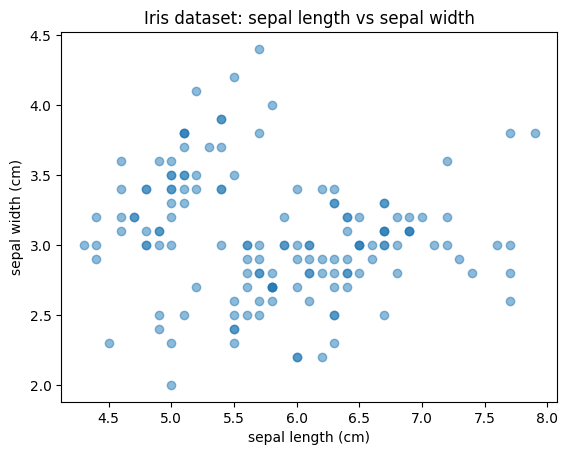

In [4]:
# Task 1
samples = iris.data

# Task 2
x = samples[:, 0]
y = samples[:, 1]

# Task 3
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal length vs sepal width')

# Task 4
plt.show()

## 5. Implementing K-Means: Step 1

The K-Means algorithm:
1. **Place `k` random centroids for the initial clusters.**
2. Assign data samples to the nearest centroid.
4. Update centroids based on the above-assigned data samples.
5. Repeat Steps 2 and 3 until convergence.

--- 

- After looking at the scatter plot and having a better understanding of the Iris data, let’s start implementing the k-means algorithm.
- In this exercise, we will implement Step 1.
- Because we expect there to be three clusters (for the three species of flowers), let’s implement k-means where the `k` is 3. 
- In real-life situations you won’t always know how many clusters to look for. 
- We’ll learn more about how to choose `k` later.
- Using the NumPy library, we will create three *random* initial centroids and plot them along with our samples.

**Task 1**  
- First, create a variable named `k` and set it to 3.

<br>

**Task 2**  
- Then, use NumPy’s `random.uniform()` function to generate random values in two lists:
    - a `centroids_x` list that will have `k` random values between `min(x)` and `max(x)`
    - a `centroids_y` list that will have `k` random values between `min(y)` and `max(y)`
- The random.uniform() function looks like:
    ```python
    np.random.uniform(low, high, size)
    ```
- The `centroids_x` will have the x-values for our initial random centroids and the `centroids_y` will have the y-values for our initial random centroids.

<br>

**Task 3**  
- Create an array named `centroids` and use the `zip()` function to add `centroids_x` and `centroids_y` to it.
- The `zip()` function looks like:
    ```python
    np.array(list(zip(array1, array2)))
    ```
- Then, print `centroids`.
- The `centroids` list should now have all the initial centroids.

<br>

**Task 4**  
- Make a scatter plot of `y` vs `x`. 
- (Remember that you’re only looking at two out of four dimensions of the data set. Based on that it might not look like there are three distinct clusters, but since we are missing two dimensions this plot won’t tell the whole story.)
- Make a scatter plot of `centroids_y` vs `centroids_x`.
- Show the plots to see your centroids!

In [5]:
iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

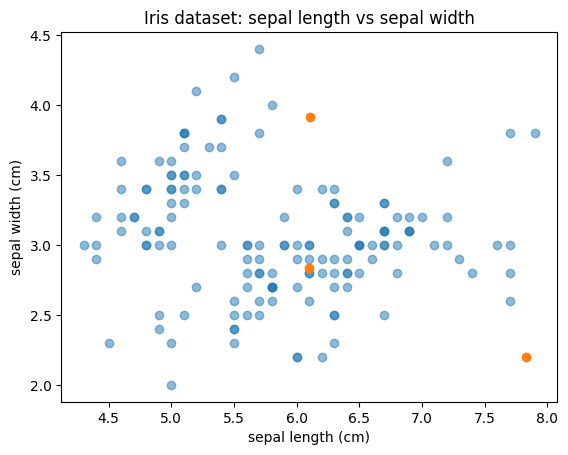

In [10]:
# Task 1
k = 3

# Task 2
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)

# Task 3
centroids = np.array(list(zip(centroids_x, centroids_y)))

# Task 4
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal length vs sepal width')
plt.show()

## 6. Implementing K-Means: Step 2

The K-Means algorithm:
1. Place `k` random centroids for the initial clusters.
2. **Assign data samples to the nearest centroid.**
4. Update centroids based on the above-assigned data samples.
5. Repeat Steps 2 and 3 until convergence.

--- 

- In this exercise, we will implement Step 2.
- Now we have the three random centroids. 
- Let’s assign data points to their nearest centroids.
- To do this we’re going to use a distance formula to write a `distance()` function.

<br>

- There are many different kinds of distance formulas. 
- The one you’re probably most familiar with is called *Euclidean distance*. 
- To find the Euclidean distance between two points on a 2-d plane, make a right triangle so that the hypotenuse connects the points. 
- The distance between them is the length of the hypotenuse.

<br>

- Another common distance formula is the *taxicab distance*. 
- The taxicab distance between two points on a 2-d plane is the distance you would travel if you took the long way around the right triangle via the two shorter sides, just like a taxicab would have to do if it wanted to travel to the opposite corner of a city block.

<br>

- Different distance formulas are useful in different situations. 
- If you’re curious, you can learn more about various distance formulas here. 
- For this lesson, we’ll use Euclidean distance.

<br>

- After we write the `distance()` function, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids.
- Suppose we have a point and a list of three distances in distances and it looks like `[15, 20, 5]`, then we would want to assign the data point to the 3rd centroid. 
- The `argmin(distances)` would return the index of the lowest corresponding distance, 2, because the index 2 contains the minimum value.

**Task 1**  
- Write a `distance()` function.
- It should be able to take in `a` and `b` and return the distance between the two points.

<br>

**Task 2**  
- Create an array called `labels` that will hold the cluster labels for each data point. 
- Its size should be the length of the data sample.
- It should look something like:
    ```python
    [ 0.  0.  0.  0.  0.  0.  ...  0.]
    ```

<br>

**Task 3**  
- Create a function called `assign_to_centroid()` that assigns the nearest centroid to a sample. 
- You’ll need to compute the distance to each centroid to find the closest one.
    ```python
    def assign_to_centroid(sample, centroids):
    # Fill in the code here
    #
    #
    #
    #
    return closest_centroid
    ```
- Then, assign the `cluster` to each index of the `labels` array.

<br>

**Task 4**  
- Write a loop that iterates through the whole data sample and assigns each sample’s closest centroid to the corresponding index of the `labels` array. 
- Use the function that you created in the previous exercise.

<br>

**Task 5**  
- Then, print `labels` (outside of the for loop).

In [77]:
iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

In [ ]:
# Task 1
def distance(a, b):
    """Euclidean distance between two points.  
    d(a, b)² = (a1 - b1)² + (a2 - b2)²
    """
    assert len(a) == len(b) # both points must have the same number of dimensions
    dist = 0
    for i in range(len(b)):
        dist += (a[i] - b[i]) ** 2
    return dist ** 0.5

# def distance_np(a, b):
#     return np.sqrt(np.sum(np.square(a - b)))

# Task 2
labels = np.zeros(len(samples))

# Task 3
def assign_to_centroid(sample, centroids):
    k = len(centroids)
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(sample, centroids[i])
    closest_centroid = np.argmin(distances)
    return closest_centroid

# Task 4
for i in range(len(samples)):
    labels[i] = assign_to_centroid(sepal_length_width[i], centroids)

# Task 5
print(labels)

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2.]


## 7. Implementing K-Means: Step 3

The K-Means algorithm:
1. Place `k` random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
4. **Update centroids based on the above-assigned data samples.**
5. Repeat Steps 2 and 3 until convergence.

--- 

- In this exercise, we will implement Step 3.
- Find new cluster centers by taking the average of the assigned points. 
- To find the average of the assigned points, we can use the `.mean()` function.

**Task 1**  
- Save the old `centroids` value before updating.
- We have already imported `deepcopy` for you:
    ```python
    from copy import deepcopy
    ```
- Store centroids into `centroids_old` using `deepcopy()`:
    ```python
    centroids_old = deepcopy(centroids)
    ```

<br>

**Task 2**  
- Then, create a for loop that iterates `k` times.
- Since `k = 3`, as we are iterating through the `for` loop each time, we can calculate the mean of the points that have the same cluster label.
- Inside the `for` loop, create an array named points where we get all the data `points` that have the cluster label `i`.
- There are two ways to do this, check the hints to see both!

<br>

**Task 3**  
- Now that we have assigned each input to its closest centroid, we can update the position of that centroid to the true center. 
- Inside the `for` loop, calculate the mean of those points using `.mean()` to get the new centroid.
- Store the new centroid in `centroids[i]`.
- The `.mean()` function looks like:
    ```python
    np.mean(input, axis=0)
    ```

<br>

**Task 4**  
- Oustide of the for loop, print `centroids_old` and centroids to see how `centroids` changed.

In [80]:
iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids
k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid
# Distance formula
def distance(a, b):
    one = (a[0] - b[0]) **2
    two = (a[1] - b[1]) **2
    distance = (one+two) ** 0.5
    return distance

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
    k = len(centroids)
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(sample, centroids[i])
    closest_centroid = np.argmin(distances)
    return closest_centroid

# Assign the nearest centroid to each sample
for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

In [82]:
# Task 1
centroids_old = deepcopy(centroids)

# Task 2 / 3
for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

# Task 4
print(centroids_old)
print(centroids)

[[4.92604114 2.17176505]
 [7.88851448 3.0023026 ]
 [4.37171805 2.9360215 ]]
[[5.76       2.68909091]
 [6.82391304 3.07826087]
 [5.01632653 3.45102041]]


## 8. Implementing K-Means: Step 4

The K-Means algorithm:
1. Place `k` random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
4. Update centroids based on the above-assigned data samples.
5. **Repeat Steps 2 and 3 until convergence.**

--- 

- In this exercise, we will implement Step 4.
- This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

<br>

- We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.
- For the condition of the while loop, we need to create an array named errors. 
- In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).
- The loop ends when all three values in errors are 0.

**Task 1**  
- Initialize error:
    ```python
    error = np.zeros(3)
    ```
- Then, use the `distance()` function to calculate the distance between the updated centroids and the old centroids and put them in `error`. 
- Here’s how to calculate the error for entry ‘0’. You can write a loop to compute each distance.
    ```python
    error[0] = distance(centroids[0], centroids_old[0])
    ```

<br>

**Task 2**  
- After that, add a while loop:
    ```python
    while error.all() != 0:
    ```
- And move *everything* below (from Step 2 and 3) inside.
- And recalculate `error` again at the end of each iteration of the while loop. 
- You can put this line inside the ‘for’ loop that computes the new centroids:
    ```python
    error[i] = distance(centroids[i], centroids_old[i])
    ```

<br>

**Task 3**  
- Awesome, now you have everything, let’s visualize it.
- After the `while` loop finishes, let’s create an array of colors:
    ```python
    colors = ['r', 'g', 'b']
    ```
- Then, create a `for` loop that iterates `k` times.
- Inside the `for` loop (similar to what we did in the last exercise), create an array named `points` where we get all the data points that have the cluster label `i`.

<br>

- Then we are going to make a scatter plot of `points[:, 0]` vs `points[:, 1]` using the `scatter()` function:
    ```python
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)
    ```

<br>

**Task 4**  
- Then, paste the following code at the very end. Here, we are visualizing all the points in each of the `labels` a different color.
    ```python	
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
    
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')

    plt.show()
    ```

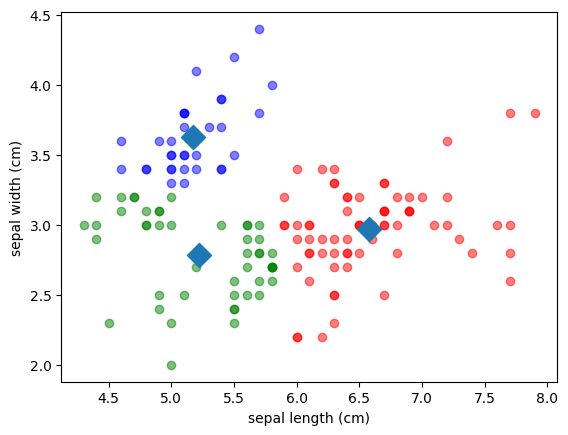

In [95]:
iris = datasets.load_iris()

samples = iris.data
x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))




# Helper Functions
def distance(a, b):
    """Euclidean distance between two points."""
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one + two) ** 0.5
    return distance

def assign_to_centroid(sample, centroids):
    """A function that assigns the nearest centroid to a sample."""
    k = len(centroids)
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(sample, centroids[i])
    closest_centroid = np.argmin(distances)
    return closest_centroid




# Step 1: Place K random centroids
k = 3
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

# Initialize error:
error = np.zeros(3)

for i in range(k):
    error[i] = distance(centroids[i], centroids_old[i])




# Repeat Steps 2 and 3 until convergence:
while error.all() != 0:
    
    # Step 2: Assign samples to nearest centroid
    for i in range(len(samples)):
        labels[i] = assign_to_centroid(samples[i], centroids)
    
    # Step 3: Update centroids
    centroids_old = deepcopy(centroids)
    for i in range(k):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
        error[i] = distance(centroids[i], centroids_old[i])




# Visualize the results
colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## 9. Implementing K-Means: Scikit-Learn

**Task 1**  
- First, import `KMeans` from `sklearn.cluster`.

<br>

**Task 2**  
- Somewhere after `samples = iris.data`, use `KMeans()` to create an instance called `model` to find 3 clusters.
- To specify the number of clusters, use the `n_clusters` keyword argument.

<br>

**Task 3**  
- Next, use the `.fit()` method of model to fit the `model` to the array of points `samples`.

<br>

**Task 4**  
- After you have the “fitted” model, determine the cluster labels of `samples`.
- Then, print the `labels`.

In [97]:
iris = datasets.load_iris()

samples = iris.data

In [98]:
# Task 2
model = KMeans(n_clusters=3)

# Task 3
model.fit(samples)

# Task 4
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


## 10. New Data?

**Task 1**  
- First, store the 2D matrix:
    ```python
    new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
                            [6.5, 3. , 5.5, 0.4],
                            [5.8, 2.7, 5.1, 1.9]])
    ```
- To test if it worked, print the `new_samples`.

<br>

**Task 2**  
- Use the model to predict labels for the `new_samples`, and print the predictions.
- The output might look like:
    ```python
    [0 2 2]
    ```
- Those are the predicted labels for our three new flowers.
- If you are seeing different labels, don’t worry! 
- Since the cluster centroids are randomly initialized, running the model repeatedly can produce different clusters with the same input data.

<br>

**Task 3**  
- You may want to see the names of the predicted classes instead of just the numerical targets. 
- Create a list called `new_names`. Use `iris.target_names` to convert the target numbers to text names and print the result.
-  You can use a list comprehension something like this:
    ```python
    new_names = [iris.target_names[label] for label in labels]
    ```
- The output might look like:
    ```python
    ['setosa' 'virginica' 'virginica']
    ```

In [ ]:
iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

KMeans(n_clusters=3)

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
# Task 1
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
                        [6.5, 3.0, 5.5, 1.8],
                        [5.8, 2.7, 5.1, 1.9]])
print(new_samples)

# Task 2
preds = model.predict(new_samples)

# Task 3
new_names = [iris.target_names[pred] for pred in preds]
print(new_names)

[[5.7 4.4 1.5 0.4]
 [6.5 3.  5.5 1.8]
 [5.8 2.7 5.1 1.9]]
[np.str_('setosa'), np.str_('virginica'), np.str_('versicolor')]


## 11. Visualize After K-Means

**Task 1**  
- Create an array called `x` that contains the Column `0` of `samples`.
- Create an array called `y` that contains the Column `1` of `samples`.

<br>

**Task 2**  
- Make a scatter plot of `x` and `y`, using labels to define the colors.


In [129]:
iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


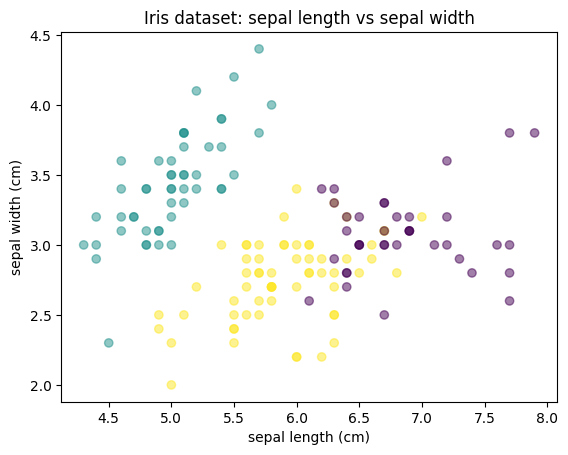

In [134]:
# Task 1
x = samples[:,0]
y = samples[:,1]

# Task 2
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal length vs sepal width')
plt.show()

## 12. Evaluation

**Task 1**  
- pandas is already imported for you:
    ```python
    import pandas as pd
    ```
- Add the code from the narrative to get the `species` list.

<br>

**Task 2**  
- Then create and print a DataFrame:
    ```python
    df = pd.DataFrame({'labels': labels, 'species': species})
    
    print(df)
    ```

<br>

**Task 3**  
- Next, use the `crosstab()` method to perform cross-tabulation:
    ```python
    ct = pd.crosstab(df['labels'], df['species'])
    print(ct)
    ```
- Expand the right panel (output terminal).
- *How accurate are the clusters?*

In [ ]:
iris = datasets.load_iris()

samples = iris.data

target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

# convert the predicted label (0, 1, 2) to the string label 
# (setosa, versicolor, virginica)
labels = [iris.target_names[s] for s in model.predict(samples)] 

In [ ]:
# Task 1
# shows the real species as names instead of numbers
species = [iris.target_names[t] for t in target]    

# Task 2
df = pd.DataFrame({'labels': labels, 'species': species})
df

,labels,species
0,versicolor,setosa
1,virginica,setosa
2,virginica,setosa
3,virginica,setosa
4,versicolor,setosa
...,...,...
145,setosa,virginica
146,setosa,virginica
147,setosa,virginica
148,setosa,virginica


In [135]:
# Task 3
ct = pd.crosstab(df['labels'], df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
setosa,0,47,50
versicolor,29,3,0
virginica,21,0,0


## 13. The Number of Clusters

**Task 1**  
- First, create two lists:
    - `num_clusters` that has values from 1, 2, 3, … 8
    - `inertias` that is empty

<br>

**Task 2**  
- Then, iterate through `num_clusters` and calculate k-means for each number of clusters.
- Add each of their inertias into the `inertias` list.

<br>

**Task 3**  
- Plot the `inertias` vs `num_clusters`:
    ```python
    plt.plot(num_clusters, inertias, '-o')

    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')

    plt.show()
    ```

In [136]:
iris = datasets.load_iris()

samples = iris.data

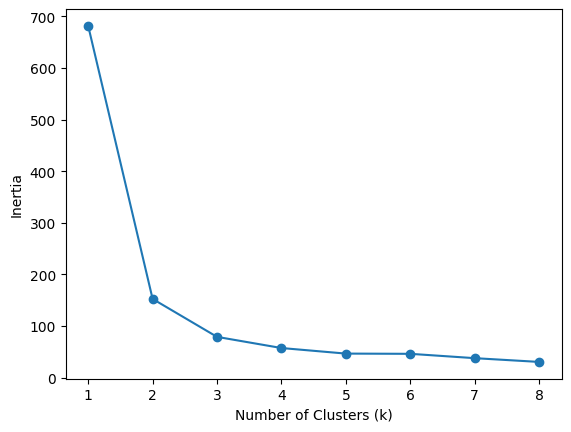

In [141]:
# Task 1
num_clusters = list(range(1, 9))
inertias = []

# Task 2
for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

# Task 3
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## 14. Try It On Your Own

[UCI Digit Dataset](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

- All input attributes are integers in the range 0..16.
- The last attribute is the class code 0..9

In [2]:
# Loading training and test data
digits_tra = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# This test dataset is also included in sklean.datasets as load_digits
digits_tes = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", header=None)  

len(digits_tra), len(digits_tes)

(3823, 1797)

Additional Information:
- 8x8 image (64 pixels)
- each pixel is an integer in the range 0..16 (0=white, 16=black)
- first 64 columns are the pixel values
- the last column is the class code (0..9)

In [3]:
digits_tes.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Let`s invoke some rows and plot the data.

Number Matrix:
[[ 0  1  6 15 12  1  0  0]
 [ 0  7 16  6  6 10  0  0]
 [ 0  8 16  2  0 11  2  0]
 [ 0  5 16  3  0  5  7  0]
 [ 0  7 13  3  0  8  7  0]
 [ 0  4 12  0  1 13  5  0]
 [ 0  0 14  9 15  9  0  0]
 [ 0  0  6 14  7  1  0  0]]
Number is 0


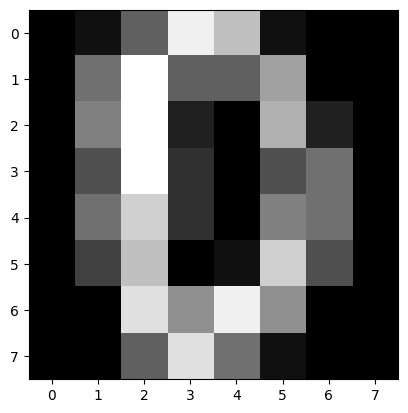

In [60]:
row = 0
img = digits_tra.iloc[row, :-1].values.reshape(-1, 8)
img_num = digits_tra.iloc[row, -1]
print("Number Matrix:")
print(img)
print(f"Number is {img_num}")
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
# Split the data into features (X) and target (y)
X_train, y_train = digits_tra.iloc[:, :-1], digits_tra.iloc[:, -1]
X_test, y_test = digits_tes.iloc[:, :-1], digits_tes.iloc[:, -1]

In [ ]:
model = KMeans(n_clusters=10)
model.fit(X_train)
preds = model.predict(X_test)
print(model.inertia_)

crosstab = pd.crosstab(preds, y_test, rownames=['clusters'], colnames=['digits'])
# crosstab.to_markdown("digits_crosstab_preds_test.md")
crosstab

2556218.1735685035


digits,0,1,2,3,4,5,6,7,8,9
clusters,,,,,,,,,,
0,0,1,7,160,0,23,0,0,17,130
1,2,0,0,0,159,1,0,1,0,0
2,0,0,4,8,5,0,0,164,1,2
3,0,0,0,0,0,3,84,0,0,0
4,0,22,0,5,2,71,1,9,11,43
5,0,18,152,0,0,0,0,0,1,0
6,0,128,6,0,9,1,1,0,28,0
7,176,0,1,0,0,0,0,0,0,0
8,0,7,7,10,6,83,2,5,113,5


Let`s find the optimal number of clusters.

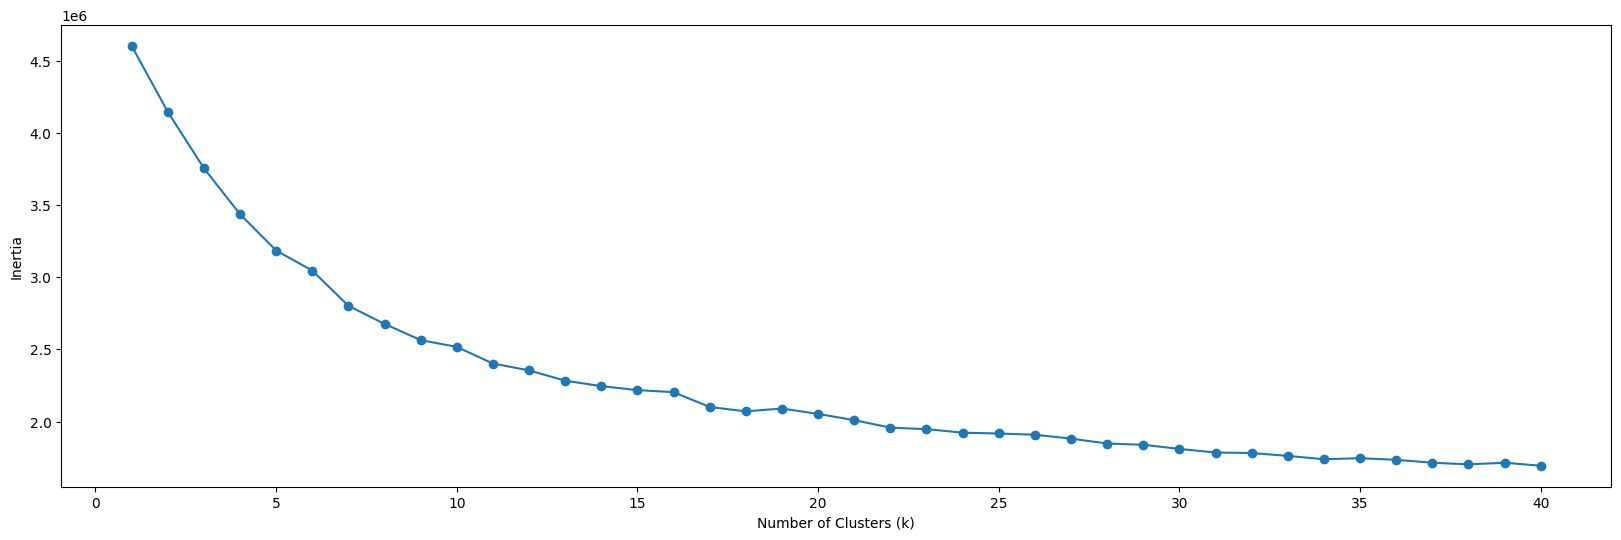

In [59]:
n_clusters = list(range(1, 41, 1))
inertias = []

for k in n_clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.figure(figsize=(20, 6))
plt.plot(n_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()